In [6]:
import numpy as np
import pandas as pd

##thanks to https://www.kaggle.com/toregil/mystery-planet-99-8-cnn and https://www.kaggle.com/aleksod/0-75-precision-0-60-recall-linear-svc
##very useful kernels pls have a look at their implementations too!

In [7]:
train = pd.read_csv("/kaggle/input/kepler-labelled-time-series-data/exoTrain.csv")

In [8]:
test = pd.read_csv("/kaggle/input/kepler-labelled-time-series-data/exoTest.csv")

In [9]:
train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [10]:
train.groupby('LABEL').size()

LABEL
1    5050
2      37
dtype: int64

In [11]:
train.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [12]:
test.groupby('LABEL').size()

LABEL
1    565
2      5
dtype: int64

THE FOLLOWING ARE STARS WITH EXOPLANETS...

In [13]:
train[0:37]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,2,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,2,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,2,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65
9,2,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91


In [14]:
import matplotlib.pyplot as plt

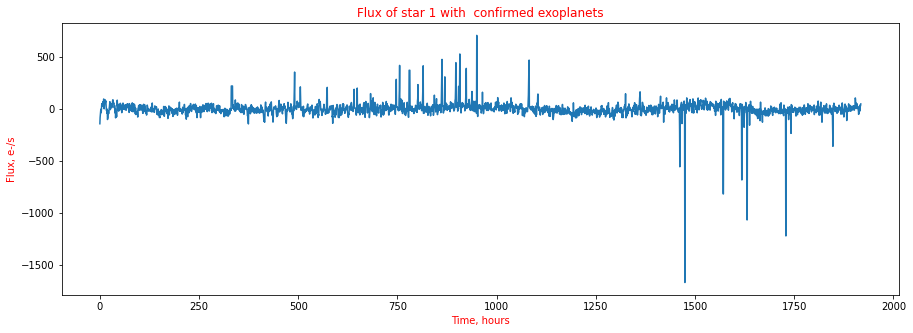

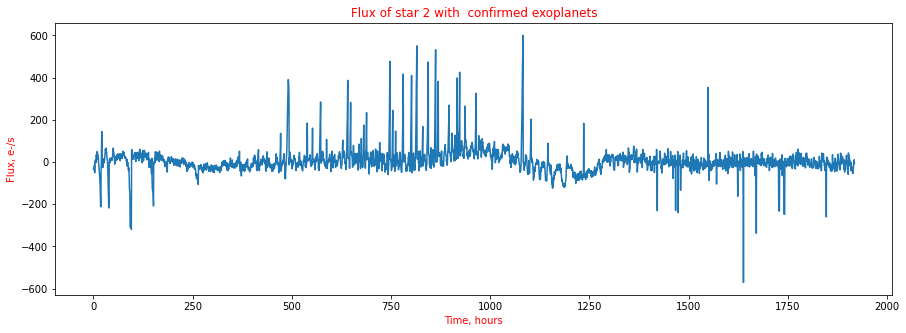

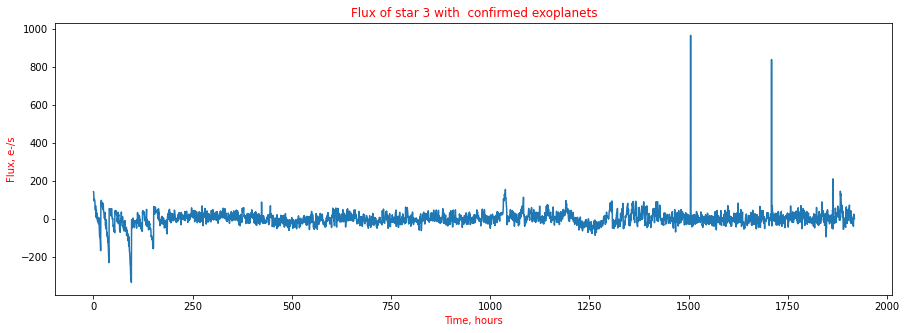

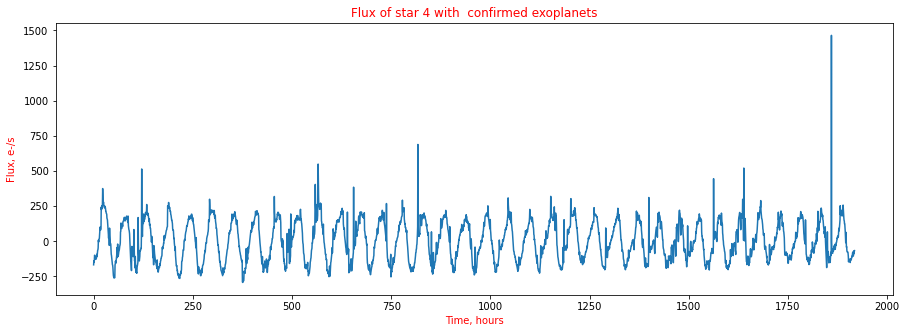

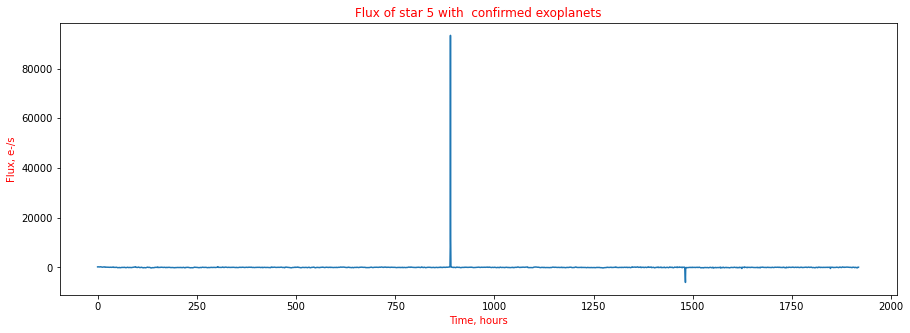

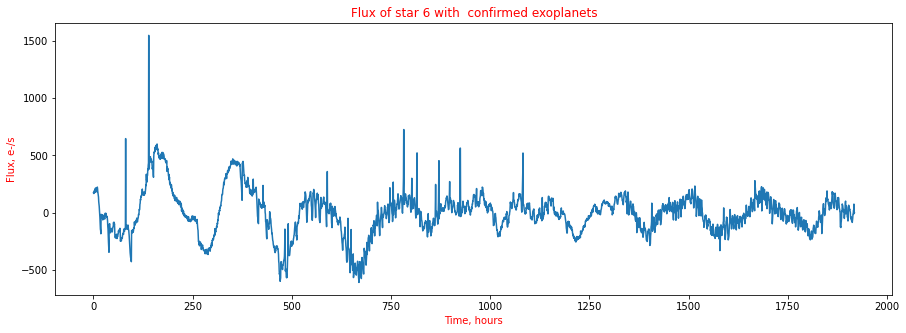

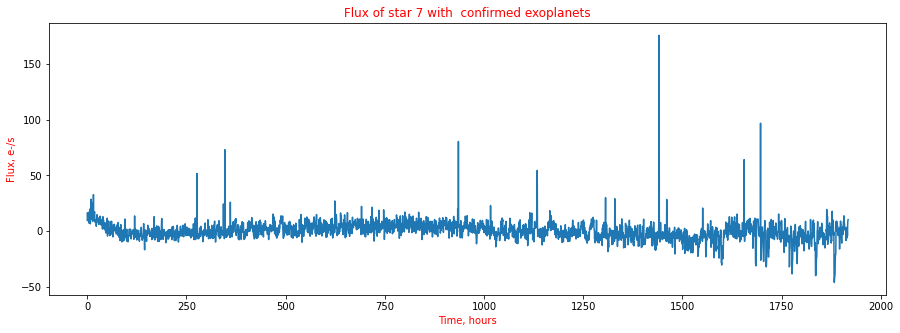

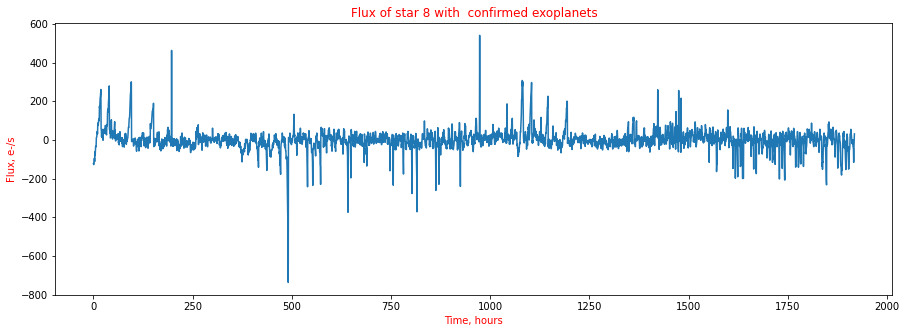

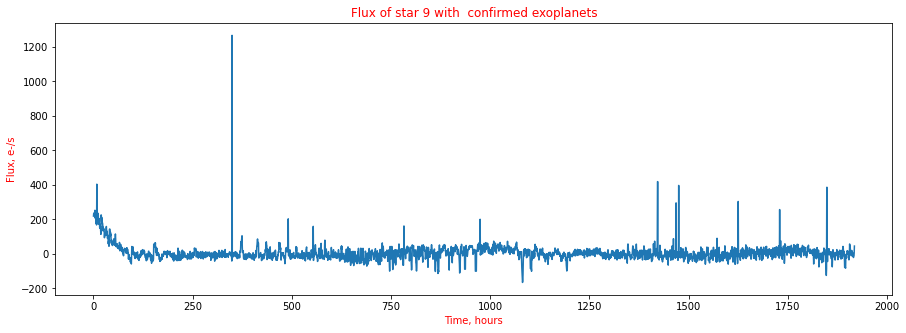

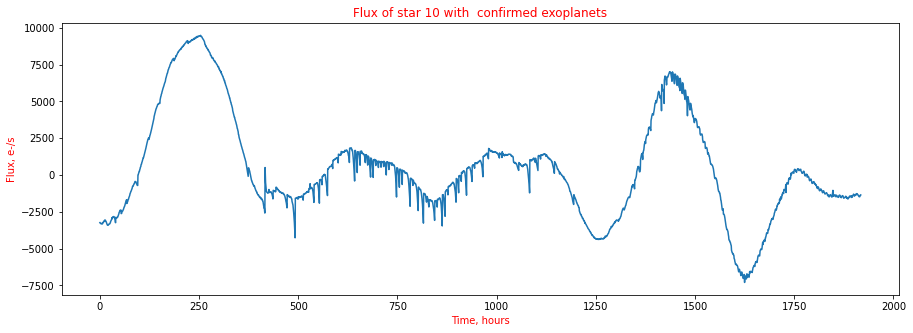

In [15]:
for i in range(0,10): #random numbers :/
    flux = train[train.LABEL == 1].drop('LABEL', axis=1).iloc[i,:]
    time = np.arange(len(flux)) * (36.0/60.0) # time in units of hours
    plt.figure(figsize=(15,5))
    plt.title('Flux of star {} with  confirmed exoplanets'.format(i+1),color='r')
    plt.ylabel('Flux, e-/s',color='r')
    plt.xlabel('Time, hours',color='r')
    plt.plot(time, flux)

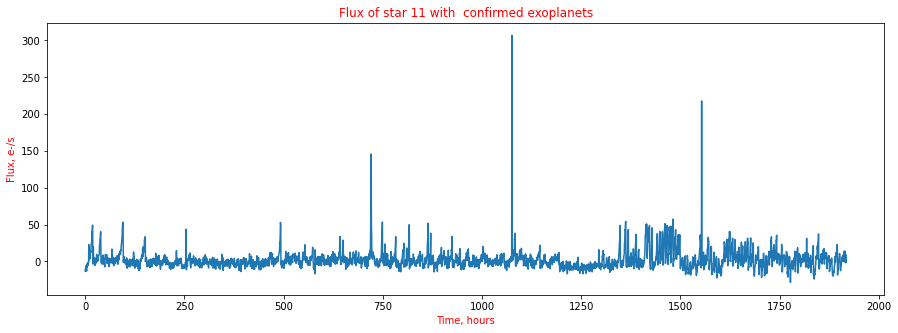

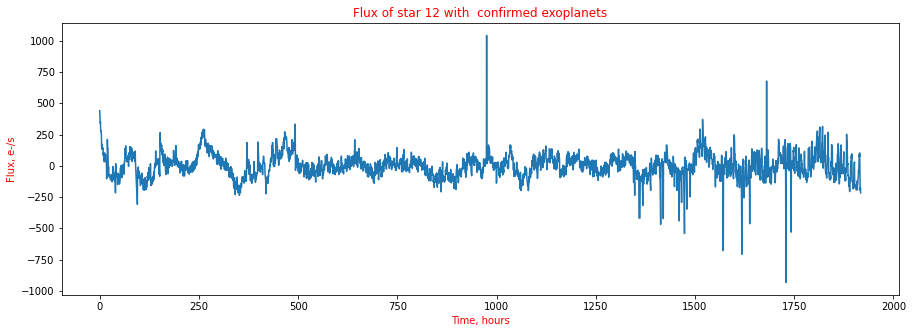

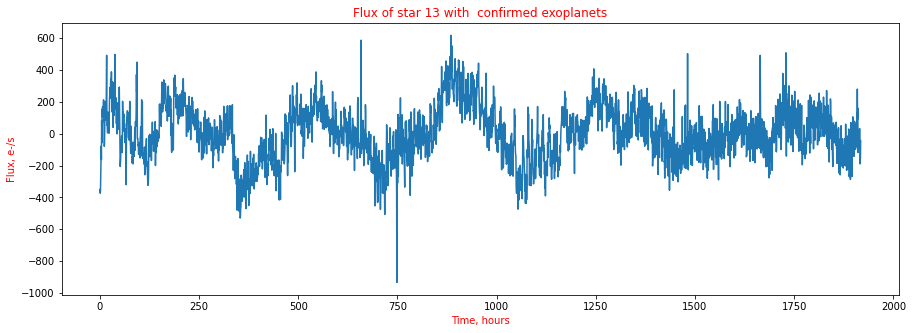

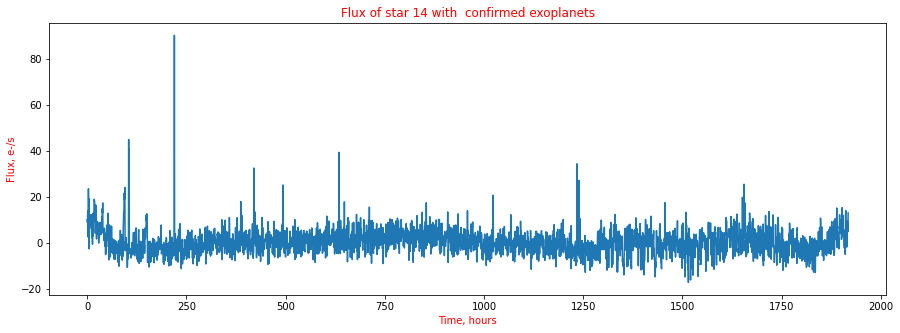

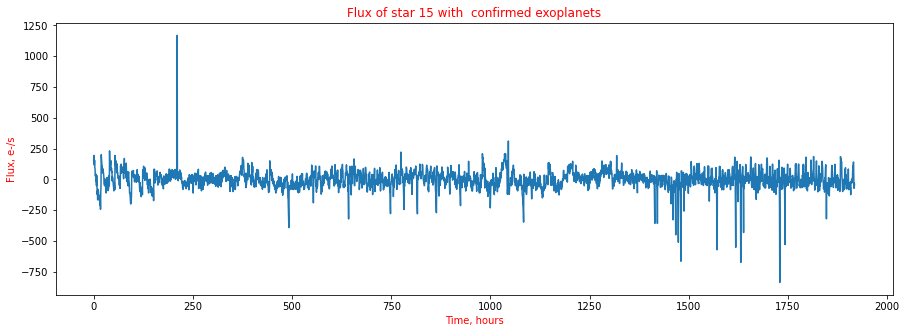

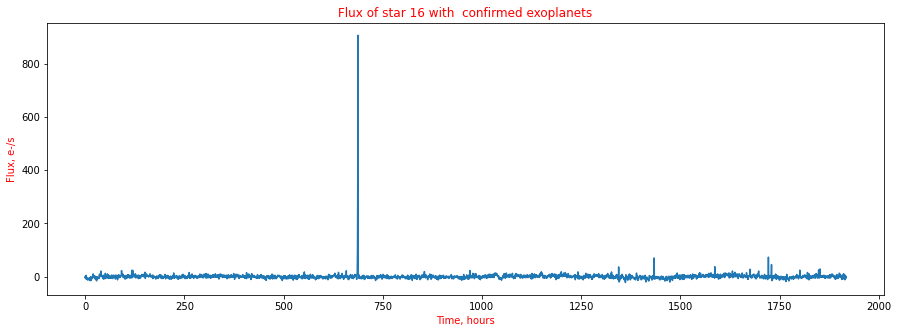

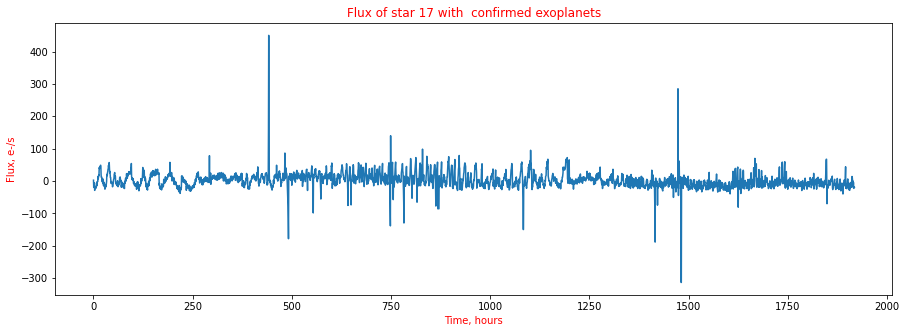

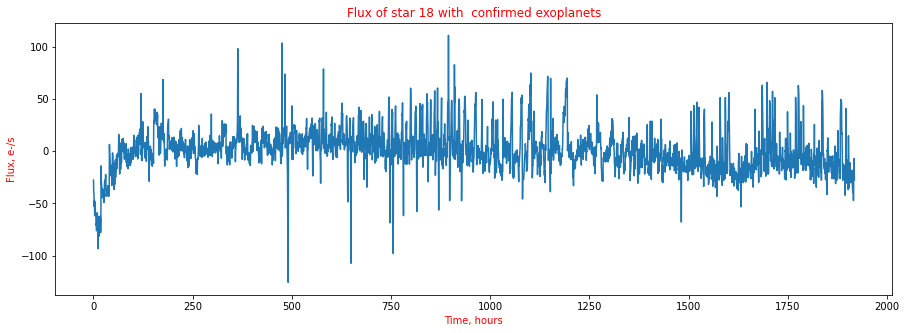

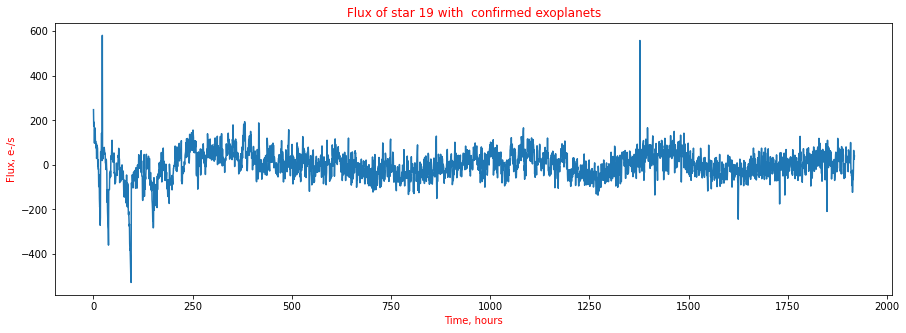

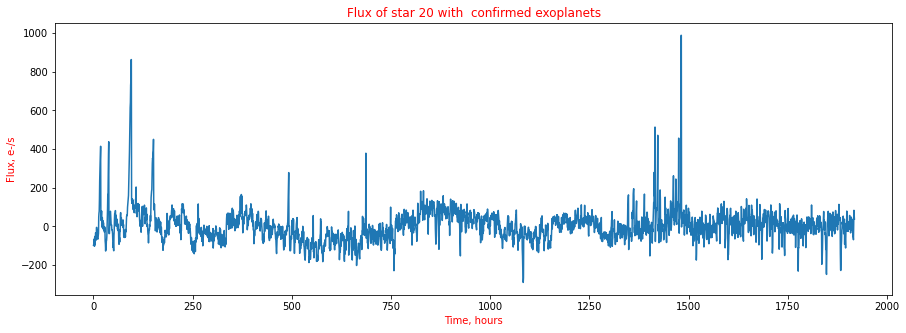

In [16]:
for i in range(10,20): #random numbers :/
    flux = train[train.LABEL == 1].drop('LABEL', axis=1).iloc[i,:]
    time = np.arange(len(flux)) * (36.0/60.0) # time in units of hours
    plt.figure(figsize=(15,5))
    plt.title('Flux of star {} with  confirmed exoplanets'.format(i+1),color='r')
    plt.ylabel('Flux, e-/s',color='r')
    plt.xlabel('Time, hours',color='r')
    plt.plot(time, flux)

In [17]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPool1D, Flatten
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [18]:
INPUT_LIB = '/kaggle/input/kepler-labelled-time-series-data/'
raw_data = np.loadtxt(INPUT_LIB + 'exoTrain.csv', skiprows=1, delimiter=',')
x_train = raw_data[:, 1:]
y_train = raw_data[:, 0, np.newaxis] - 1.
raw_data = np.loadtxt(INPUT_LIB + 'exoTest.csv', skiprows=1, delimiter=',')
x_test = raw_data[:, 1:]
y_test = raw_data[:, 0, np.newaxis] - 1.
del raw_data

In [19]:
x_train = ((x_train - np.mean(x_train, axis=1).reshape(-1,1)) / 
           np.std(x_train, axis=1).reshape(-1,1))
x_test = ((x_test - np.mean(x_test, axis=1).reshape(-1,1)) / 
          np.std(x_test, axis=1).reshape(-1,1))

In [20]:
from scipy.ndimage.filters import uniform_filter1d
x_train = np.stack([x_train, uniform_filter1d(x_train, axis=1, size=200)], axis=2)
x_test = np.stack([x_test, uniform_filter1d(x_test, axis=1, size=200)], axis=2)

In [21]:
x_train = x_train - x_train.mean()
x_train = x_train / x_train.max()

In [22]:
x_test = x_test - x_test.mean()
x_test = x_test / x_test.max()

In [34]:
model = Sequential()
model.add(Conv1D(input_shape=x_train.shape[1:],filters=64,kernel_size=9,padding="same", activation="relu"))
model.add(Conv1D(filters=64,kernel_size=9,padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=4,strides=4))
model.add(Conv1D(filters=128, kernel_size=9, padding="same", activation="relu"))
model.add(Conv1D(filters=128, kernel_size=9, padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=4,strides=4))
model.add(Conv1D(filters=256, kernel_size=9, padding="same", activation="relu"))
model.add(Conv1D(filters=256, kernel_size=9, padding="same", activation="relu"))
model.add(Conv1D(filters=256, kernel_size=9, padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=4,strides=4))
model.add(Conv1D(filters=512, kernel_size=9, padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=9, padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=9, padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=4,strides=4))
model.add(Conv1D(filters=512, kernel_size=9, padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=9, padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=9, padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=4,strides=4))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation='sigmoid'))

The next cell picks data for us. Since our data is highly imbalanced we need to use this function to pick equal amounts of data from both the classes.

In [24]:
def batch_generator(x_train, y_train, batch_size=32):
    """
    Gives equal number of positive and negative samples, and rotates them randomly in time
    """
    half_batch = batch_size // 2
    x_batch = np.empty((batch_size, x_train.shape[1], x_train.shape[2]), dtype='float32')
    y_batch = np.empty((batch_size, y_train.shape[1]), dtype='float32')
    
    yes_idx = np.where(y_train[:,0] == 1.)[0]
    non_idx = np.where(y_train[:,0] == 0.)[0]
    
    while True:
        np.random.shuffle(yes_idx)
        np.random.shuffle(non_idx)
    
        x_batch[:half_batch] = x_train[yes_idx[:half_batch]]
        x_batch[half_batch:] = x_train[non_idx[half_batch:batch_size]]
        y_batch[:half_batch] = y_train[yes_idx[:half_batch]]
        y_batch[half_batch:] = y_train[non_idx[half_batch:batch_size]]
    
        for i in range(batch_size):
            sz = np.random.randint(x_batch.shape[1])
            x_batch[i] = np.roll(x_batch[i], sz, axis = 0)
     
        yield x_batch, y_batch

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=4e-5)
model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['binary_accuracy'])
hist = model.fit_generator(batch_generator(x_train, y_train, 32), 
                           validation_data=(x_test, y_test), 
                           verbose=2, epochs=50,
                           steps_per_epoch=x_train.shape[1]//32)

Epoch 1/50
 - 6s - loss: 0.6342 - binary_accuracy: 0.6638 - val_loss: 0.4602 - val_binary_accuracy: 0.8035
Epoch 2/50
 - 5s - loss: 0.5404 - binary_accuracy: 0.7449 - val_loss: 0.5685 - val_binary_accuracy: 0.7737
Epoch 3/50
 - 5s - loss: 0.5226 - binary_accuracy: 0.7497 - val_loss: 0.2521 - val_binary_accuracy: 0.8860
Epoch 4/50
 - 5s - loss: 0.4981 - binary_accuracy: 0.7705 - val_loss: 0.3642 - val_binary_accuracy: 0.8474
Epoch 5/50
 - 5s - loss: 0.3945 - binary_accuracy: 0.8438 - val_loss: 0.1723 - val_binary_accuracy: 0.9070
Epoch 6/50
 - 5s - loss: 0.3431 - binary_accuracy: 0.8677 - val_loss: 0.2658 - val_binary_accuracy: 0.9000
Epoch 7/50
 - 5s - loss: 0.2286 - binary_accuracy: 0.9208 - val_loss: 0.1621 - val_binary_accuracy: 0.9491
Epoch 8/50
 - 5s - loss: 0.2006 - binary_accuracy: 0.9302 - val_loss: 0.1509 - val_binary_accuracy: 0.9281
Epoch 9/50
 - 5s - loss: 0.1594 - binary_accuracy: 0.9504 - val_loss: 0.1088 - val_binary_accuracy: 0.9491
Epoch 10/50
 - 5s - loss: 0.1434 - bi

In [ ]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['binary_accuracy'], color='b')
plt.plot(hist.history['val_binary_accuracy'], color='r')
plt.show()

In [ ]:
non_idx = np.where(y_test[:,0] == 0.)[0]
yes_idx = np.where(y_test[:,0] == 1.)[0]
y_hat = model.predict(x_test)[:,0]

In [ ]:
X = range(len(y_hat))

APPLYING A THRESHOLD OF 0.7 on my predictions

In [ ]:
y_test_pred=[]
for i in y_hat:
    if i>=0.7:
        y_test_pred.append(1)
    else:
        y_test_pred.append(0)

In [ ]:
plt.scatter(X,y_test_pred,color='b')
plt.show()
plt.scatter(X,y_test,color='r')
plt.show()

In [ ]:
y_test_pred=np.asarray(y_test_pred)

We use the following metrics to evaluate our model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("accuracy ",accuracy_score(y_test, y_test_pred))
print("precision ",precision_score(y_test, y_test_pred))
print("recall-score ",recall_score(y_test, y_test_pred))
print("f1-score ",f1_score(y_test, y_test_pred))        

Precision is the fraction of relevant instances among the retrieved instances, while recall is the fraction of the total amount of relevant instances that were actually retrieved. So our model is performing pretty well using vgg16 architecture. I havent tried using the pre trained weights of vgg but that might give some interesting results too!